## Resultados

In [2]:
import Pkg; Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.8/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.0
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [9]:
using Plots
using LaTeXStrings
using DelimitedFiles

In [78]:
function errorbox(x, y, dx, dy; kwargs...)
    
    box_around_point(x, y, dx, dy) = Shape(x .+ [-dx, dx, dx, -dx], y .+ [-dy, -dy, dy, dy])
    
    plt = plot()
    
    for i in 1:length(x)
        box = box_around_point(x[i], y[i], dx[i], dy[i])
        plot!(box, opacity=0.5, color="blue";kwargs...)
    end
    scatter!(x, y; xerr=dx, yerr=dy, kwargs...)
    plot!(x,y;opacity=0.2,seriestype=:bar,kwargs...)
    return plt
end

errorbox (generic function with 1 method)

In [ ]:
x =[1,2,3,4]
y = [1390,1403.134,1413.49,1315.97]
dy = [1.42,0.126,2.45,9.63]
dx = [1,1,1,1]*0.4
plot = errorbox(x,y,dx,dy; color="black",label="",title="hola",xlabel="chau")
display(temp)

### Tipos de configuraciones con OpenBLAS corriendo con paralelización de MCTDH via OpenMP o via Posix threads

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS (según corresponda)
```bash
    # OpenMP
    export OMP_NUM_THREADS=2
    # OpenBLAS
    export OPENBLAS_NUM_THREADS=1
    export USE_THREAD=0
    export USE_LOCKING=1
    chunksize=512
    export OMP_SCHEDULE="static,${chunksize}"
```

Dentro de `input_file.inp` se utilizó la siguiente configuración para paralelismo con POSIX threads
```bash
    usepthreads=2
```

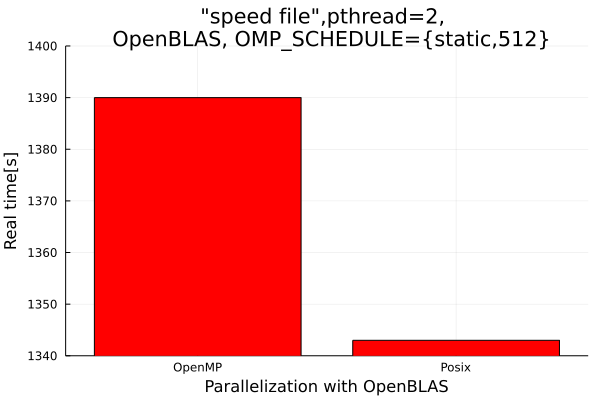

In [139]:
conf = ["OpenMP","Posix"] # [set_run_configuration_02,set_run_configuration_01]
time = [1390,1343]
plt1 = plot(conf,time,seriestype =:bar,color="red",label="",ylims=(1340,1400))
plot1 = plot!(plt1,title="\"speed file\",pthread=2, \n OpenBLAS, OMP_SCHEDULE={static,512}",xlabel="Parallelization with OpenBLAS",ylabel="Real time[s]")

### Típico error arrojado por MCTDH al compilar con un stacksize muy pequeño
```bash
cat result_2QDot3e_04_0.20/speed | tail -n 1
```
```bash
OMP: Warning #80: OMP_STACKSIZE="10K": value too small.
OMP: Info #107: OMP_STACKSIZE value "16k" will be used.
OMP: Error #29: Unable to set OMP thread stack size to 17536 bytes:
OMP: System error #22: Invalid argument
OMP: Hint Try increasing OMP_STACKSIZE or the shell stack limit.
```

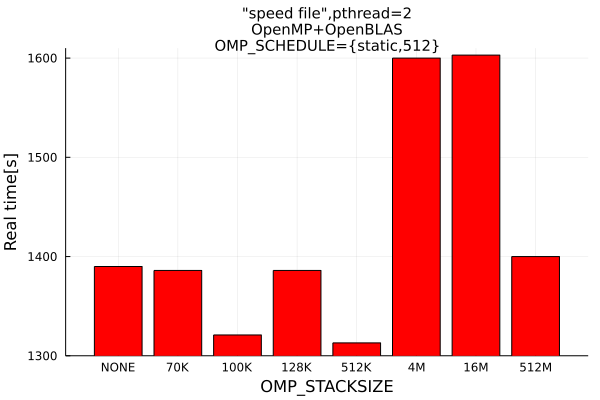

In [137]:
conf = ["NONE","70K","100K","128K","512K","4M","16M","512M"] # [01,06,05,08,04,03,02,07]
time = [1390,1386,1321,1386,1313,1600,1603,1400]
plt1 = plot(conf,time,seriestype =:bar,color="red",label="",ylims=(1300,1610))
plot1 = plot!(plt1,title="\"speed file\",pthread=2\nOpenMP+OpenBLAS\nOMP_SCHEDULE={static,512}",xlabel="OMP_STACKSIZE",ylabel="Real time[s]",titlefontsize=10)


### /result_2QDot3e_staksize128K

```bash
 Performance counter stats for 'mctdh86P -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_7.inp' (2 runs):

 6,649,626,830,613      cycles                                                        ( +-  0.10% )
23,673,158,471,321      instructions              #    3.56  insn per cycle           ( +-  0.01% )
   306,097,912,476      cache-references                                              ( +-  1.26% )
    16,061,424,454      cache-misses              #    5.182 % of all cache refs      ( +-  2.52% )

           1403.09 +- 5.68 seconds time elapsed  ( +-  0.40% )
```
### /result_2QDot3e_staksize256K

```bash
 Performance counter stats for 'mctdh86P -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_8.inp' (2 runs):

 6,674,974,325,612      cycles                                                        ( +-  0.07% )
23,676,763,300,223      instructions              #    3.55  insn per cycle           ( +-  0.01% )
   330,160,261,018      cache-references                                              ( +-  3.74% )
    17,823,974,018      cache-misses              #    5.608 % of all cache refs      ( +-  2.60% )

           1402.62 +- 2.44 seconds time elapsed  ( +-  0.17% )
```
### /result_2QDot3e_staksize512K
```bash
 Performance counter stats for 'mctdh86P -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_9.inp' (2 runs):

 6,660,618,346,512      cycles                                                        ( +-  0.06% )
23,680,680,641,630      instructions              #    3.55  insn per cycle           ( +-  0.02% )
   318,679,968,423      cache-references                                              ( +-  0.40% )
    16,437,031,882      cache-misses              #    5.137 % of all cache refs      ( +-  1.88% )

           1401.74 +- 1.41 seconds time elapsed  ( +-  0.10% )
```
### /result_2QDot3e_staksize8M
```bash
 Performance counter stats for 'mctdh86P -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_3.inp' (2 runs):

 6,644,986,782,971      cycles                                                        ( +-  0.06% )
23,668,140,209,640      instructions              #    3.56  insn per cycle           ( +-  0.01% )
   317,943,970,247      cache-references                                              ( +-  3.08% )
    15,489,638,406      cache-misses              #    5.027 % of all cache refs      ( +-  2.22% )

          1375.478 +- 0.684 seconds time elapsed  ( +-  0.05% )
```
### /result_2QDot3e_staksize64M
```bash
 Performance counter stats for 'mctdh86P -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_6.inp' (2 runs):

 6,655,006,485,418      cycles                                                        ( +-  0.12% )
23,670,560,224,553      instructions              #    3.56  insn per cycle           ( +-  0.02% )
   317,243,498,398      cache-references                                              ( +-  0.97% )
    16,264,919,158      cache-misses              #    5.177 % of all cache refs      ( +-  4.46% )

           1383.08 +- 7.46 seconds time elapsed  ( +-  0.54% )
```
### /result_2QDot3e_staksize512M
```bash
 Performance counter stats for 'mctdh86P -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_9.inp' (2 runs):

 6,583,916,215,013      cycles                                                        ( +-  0.13% )
23,679,937,441,818      instructions              #    3.59  insn per cycle           ( +-  0.02% )
   314,442,301,205      cache-references                                              ( +-  1.41% )
     9,395,739,513      cache-misses              #    3.031 % of all cache refs      ( +-  7.18% )

           1300.94 +- 4.22 seconds time elapsed  ( +-  0.32% )
```

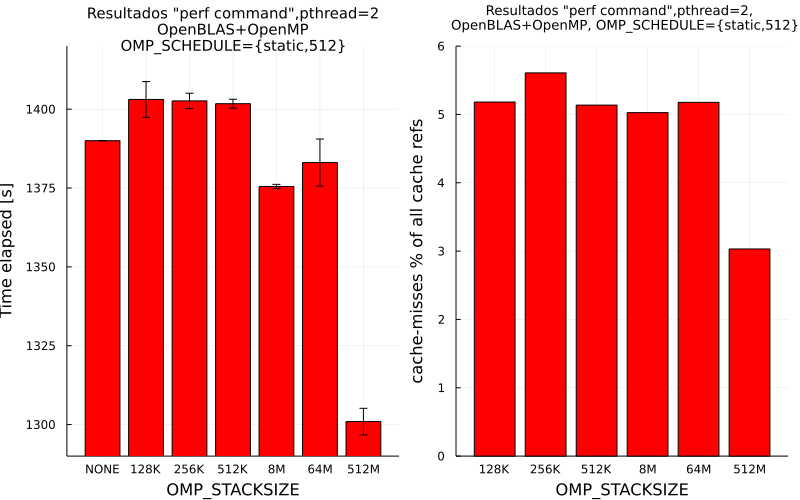

In [128]:
conf = ["NONE","128K","256K","512K","8M","64M","512M"]
time = [1390,1403.09,1402.62,1401.74,1375.478,1383.08,1300.94]
timeErr = [0.0,5.68,2.44,1.41,0.684,7.46,4.22]
plt1 = plot(    conf,time,seriestype =:bar,
                yerrorbar=timeErr,ylims=(1290,1420),
                color="red",label="")
plot1 = plot!(  plt1,
                title="\"perf command\",pthread=2\nOpenBLAS+OpenMP\nOMP_SCHEDULE={static,512}",
                titlefontsize=10,
                xlabel="OMP_STACKSIZE",
                ylabel="Time elapsed [s]")

conf = ["128K","256K","512K","8M","64M","512M"]
cachemisses = [5.182,5.608,5.137,5.027,5.177,3.031]
cachemissesErr = [2.52,2.60,1.88,2.22,4.46,7.18]
plt2 = plot(    conf,cachemisses,seriestype =:bar,
                ylims=(0,6),
                color="red",label="")
plot2 = plot!(  plt2,
                title="\"perf command\",pthread=2\nOpenBLAS+OpenMP\nOMP_SCHEDULE={static,512}",
                titlefontsize=9,
                xlabel="OMP_STACKSIZE",
                ylabel="cache-misses % of all cache refs")

plot!(plot1,plot2,layout=(1,2),size=(800,500))

# Usando flags de compilación en gfortran
```bash
MCTDH_FFLAGS_0PT_01="-O3 -fno-inline -ffast-math -fforce-addr -march=native -Ofast -msse4 -mavx2 -ftree-vectorize"
MCTDH_FFLAGS_OPT=${MCTDH_FFLAGS_0PT_01}" -fconvert=little-endian -frecord-marker=4 -funroll-loops -fno-align-commons"
```

### folder result_2QDot3e_FlagsConf01 : OpenMP+OpenBLAS (2threads)

```bash
 Performance counter stats for 'mctdh86P -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_Lambda02.inp' (2 runs):

 6,751,444,252,528      cycles                                                        ( +-  0.07% )
23,669,193,918,460      instructions              #    3.50  insn per cycle           ( +-  0.00% )
   315,343,179,959      cache-references                                              ( +-  3.27% )
    11,889,283,931      cache-misses              #    3.651 % of all cache refs      ( +-  1.54% )

           1348.35 +- 1.42 seconds time elapsed  ( +-  0.11% )
```

### folder result_2QDot3e_FlagsConf02 : Posix+OpenBLAS (2threads)
```bash
 Performance counter stats for 'mctdh86 -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_Lambda02.inp' (2 runs):

 6,681,376,284,846      cycles                                                        ( +-  0.01% )
23,697,975,029,775      instructions              #    3.55  insn per cycle           ( +-  0.03% )
   315,959,973,509      cache-references                                              ( +-  1.75% )
    16,241,572,093      cache-misses              #    5.052 % of all cache refs      ( +-  1.07% )

          1403.134 +- 0.126 seconds time elapsed  ( +-  0.01% )
```

### folder result_2QDot3e_FlagsConf04  : OpenMP+OpenBLAS (4threadss)
```bash
 Performance counter stats for 'mctdh86P -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_Lambda02.inp' (2 runs):

 6,807,469,199,450      cycles                                                        ( +-  0.12% )
23,681,414,046,539      instructions              #    3.48  insn per cycle           ( +-  0.04% )
   324,462,991,183      cache-references                                              ( +-  2.40% )
    16,227,523,354      cache-misses              #    4.884 % of all cache refs      ( +-  3.83% )

           1413.49 +- 2.45 seconds time elapsed  ( +-  0.17% )
```


### folder result_2QDot3e_FlagsConf03 : Posix+OpenBLAS (4threads)
```bash
 Performance counter stats for 'mctdh86 -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_Lambda02.inp' (2 runs):

 6,619,863,893,760      cycles                                                        ( +-  0.02% )
23,681,950,471,894      instructions              #    3.58  insn per cycle           ( +-  0.03% )
   326,002,118,118      cache-references                                              ( +-  0.42% )
    10,014,538,045      cache-misses              #    3.085 % of all cache refs      ( +-  4.83% )

           1315.97 +- 9.63 seconds time elapsed  ( +-  0.73% )
```


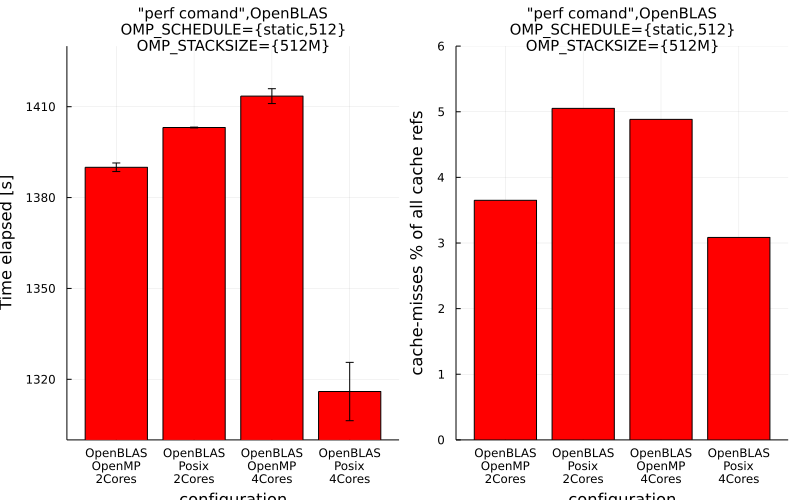

In [123]:
conf=["OpenBLAS\nOpenMP\n2Cores","OpenBLAS\nPosix\n2Cores","OpenBLAS\nOpenMP\n4Cores","OpenBLAS\nPosix\n4Cores"]
time = [1390,1403.134,1413.49,1315.97]
timeErr = [1.42,0.126,2.45,9.63]
plt1 = plot(    conf,time,seriestype =:bar,
                yerrorbar=timeErr,ylims=(1300,1430),
                color="red",label="")
plot1 = plot!(  plt1,
                title="\"perf comand\",OpenBLAS\nOMP_SCHEDULE={static,512}\nOMP_STACKSIZE={512M}",
                titlefontsize=10,
                xlabel="configuration",
                ylabel="Time elapsed [s]")

cachemisses = [3.651,5.052,4.884,3.085]
cachemissesErr = [1.54,1.07,3.83,4.83]
plt2 = plot(    conf,cachemisses,seriestype =:bar,
                ylims=(0,6),
                color="red",label="")
plot2 = plot!(  plt2,
                title="\"perf comand\",OpenBLAS\nOMP_SCHEDULE={static,512}\nOMP_STACKSIZE={512M}",
                titlefontsize=10,
                xlabel="configuration",
                ylabel="cache-misses % of all cache refs")

plot!(plot1,plot2,layout=(1,2),size=(800,500))

```bash
MCTDH_FFLAGS_OPT=${MCTDH_FFLAGS_0PT_01}" -fconvert=little-endian -frecord-marker=4 -funroll-loops -fno-align-commons"
```

### result_2QDot3e_FlagsConf05 (original flags config + threads posix + OpenBLAS)

```bash
MCTDH_FLAGS_OPT_01="-O2"

Performance counter stats for 'mctdh86 -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_Lambda02.inp' (2 runs):

 6,735,436,462,203      cycles                                                        ( +-  0.14% )
23,674,397,216,473      instructions              #    3.51  insn per cycle           ( +-  0.00% )
   295,751,491,450      cache-references                                              ( +-  1.59% )
    10,424,461,399      cache-misses              #    3.470 % of all cache refs      ( +-  6.30% )

           1338.65 +- 12.81 seconds time elapsed  ( +-  0.96% )
```

### result_2QDot3e_FlagsConf06 (flags config 03 + 4 threads posix + OpenBLAS)
```bash
MCTDH_FFLAGS_0PT_01="-O3 -fno-inline -ffast-math -fforce-addr -march=native -Ofast -msse4 -mavx2 -ftree-vectorize"

Performance counter stats for 'mctdh86 -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_Lambda02.inp' (2 runs):

 6,675,779,693,419      cycles                                                        ( +-  0.08% )
23,684,120,273,400      instructions              #    3.55  insn per cycle           ( +-  0.03% )
   301,229,998,470      cache-references                                              ( +-  0.95% )
    16,742,952,687      cache-misses              #    5.506 % of all cache refs      ( +-  2.25% )

           1404.17 +- 2.00 seconds time elapsed  ( +-  0.14% )
```

### result_2QDot3e_FlagsConf07 (flags config 04 + 4 threads posix + OpenBLAS)
```bash
MCTDH_FFLAGS_0PT_01="-O3 -fno-inline -fforce-addr -march=native -msse4 -mavx2 -ftree-vectorize"

 Performance counter stats for 'mctdh86 -mnd -w -p V_L 0.9,au -p lambda 0.2 input_file_Lambda02.inp' (2 runs):

 6,805,638,870,096      cycles                                                        ( +-  0.09% )
23,674,334,682,289      instructions              #    3.48  insn per cycle           ( +-  0.04% )
   313,252,554,590      cache-references                                              ( +-  4.40% )
    16,701,354,346      cache-misses              #    5.577 % of all cache refs      ( +-  1.42% )

           1419.81 +- 3.44 seconds time elapsed  ( +-  0.24% )
```

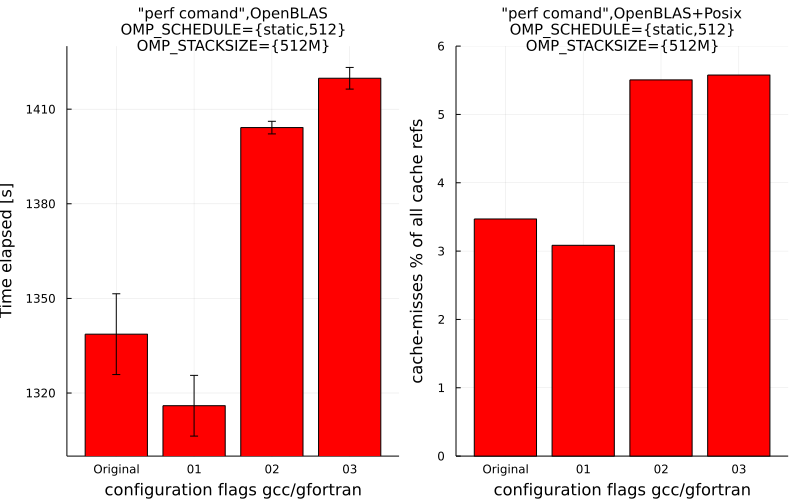

In [122]:
conf=["Original","01","02","03"]
time = [1338.65,1315.97,1404.17,1419.81]
timeErr = [12.81,9.63,2.00,3.44]
plt1 = plot(    conf,time,seriestype =:bar,
                yerrorbar=timeErr,ylims=(1300,1430),
                color="red",label="")
plot1 = plot!(  plt1,
                title="\"perf comand\",OpenBLAS\nOMP_SCHEDULE={static,512}\nOMP_STACKSIZE={512M}",
                titlefontsize=10,
                xlabel="configuration flags gcc/gfortran",
                ylabel="Time elapsed [s]")

cachemisses = [3.470,3.085,5.506,5.577]
cachemissesErr = [6.30,4.83,2.25,1.42]
plt2 = plot(    conf,cachemisses,seriestype =:bar,
                ylims=(0,6),
                color="red",label="")
plot2 = plot!(  plt2,
                title="\"perf comand\",OpenBLAS+Posix\nOMP_SCHEDULE={static,512}\nOMP_STACKSIZE={512M}",
                titlefontsize=10,
                xlabel="configuration flags gcc/gfortran",
                ylabel="cache-misses % of all cache refs")

plot!(plot1,plot2,layout=(1,2),size=(800,500))

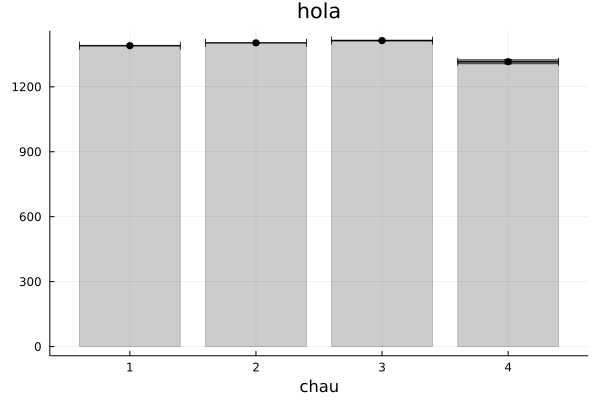

In [77]:
#%%

x =[1,2,3,4]
y = [1390,1403.134,1413.49,1315.97]
dy = [1.42,0.126,2.45,9.63]
dx = [1,1,1,1]*0.4
plot = errorbox(x,y,dx,dy; color="black",label="",title="hola",xlabel="chau")
display(temp)
#savefig(temp, "plot.png")